<a href="https://colab.research.google.com/github/MatRitchie/Bachelor/blob/main/Preprosessing_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installations

In [ ]:
!pip install nltk

In [ ]:
!pip install vec2graph

# Imporint libraries

In [ ]:
import pandas as pd
import numpy as np
from typing import Dict, Iterable, List, Tuple

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib
import matplotlib.cm as cm

from collections import Counter
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

import gensim
from gensim.models import word2vec
from gensim.models import KeyedVectors
from gensim import models
from gensim.models.word2vec import Text8Corpus

import re
import sys
import string

import nltk
nltk.download('punkt')
from nltk.stem.porter import *
from nltk.corpus import stopwords
from nltk.probability import FreqDist

import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split 
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

from vec2graph import visualize

from subprocess import check_output

from collections import defaultdict  # For word frequency

import spacy  # For preprocessing

%matplotlib inline
import os
import seaborn as sns
sns.set_style("darkgrid")

import logging  # Setting up the loggings to monitor gensim
logging.basicConfig(format="%(levelname)s - %(asctime)s: %(message)s", datefmt= '%H:%M:%S', level=logging.INFO)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


# Mounting google drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Loading dataset

In [ ]:
#Features are renamed, and the first row is skipped
feature_names = ['Artist', 'Title','Lyric']
my_dataset = pd.read_csv('/content/gdrive/My Drive/Kaggle/LYRICS_DATASET.csv', header=None, skiprows=1, names = feature_names)

my_dataset.head()


,Artist,Title,Lyric
0,Phoebe Bridgers,Motion Sickness,I hate you for what you did And I miss you li...
1,Phoebe Bridgers,Killer,Sometimes I think I'm a killer I scared you i...
2,Phoebe Bridgers,Georgia,"Georgia, Georgia, I love your son And when he..."
3,Phoebe Bridgers,Kyoto,Day off in Kyoto Got bored at the temple Look...
4,Phoebe Bridgers,Would You Rather,"Playing ""would you rather"" When it comes to f..."


Cleaning of the dataset 

# Cleaning dataset 

In [ ]:
#Cleaning of dataset(needs to be updated)
def cleaning(s):
    s = str(s)
    s = s.lower()
    s = s.replace(",","")
    s = s.replace(".","")
    s = s.replace('(demo)',"")
    s = s.replace("(new song)","")
    s = s.replace("(acoustic)","")
    s = s.replace("(cover)","")
    s = s.replace("(arctic monkeys cover)","")
    s = s.replace("(remix)","")
    s = s.replace("(argentum remix)","")
    s = s.replace("(rick ross remix)","")
    s = s.replace("(latin remix)","")
    s = s.replace("(maya jane coles remix)","")
    s = s.replace("(sir spyro remix)","")
    s = s.replace("(live)","")
    s = s.replace("(live from dublin academy)","")
    s = s.replace("(live from the late late show)","")
    s = s.replace("(bbc radio 1 live lounge)","")
    s = s.replace("(live at sofar sounds)","")
    s = s.replace("(live at windmill lane studios)","")
    s = s.replace("(live at the live room)","")
    s = s.replace("(poem)","")
    s = s.replace("[essay]","")
    s = re.sub('[!@#$+()/&?\´\-\'\’\"]', '', s)
    return s

my_dataset['Title'] = [cleaning(s) for s in my_dataset['Title']]
my_dataset['Lyric'] = [cleaning(s) for s in my_dataset['Lyric']]

my_dataset.head()

,Artist,Title,Lyric
0,Phoebe Bridgers,motion sickness,i hate you for what you did and i miss you li...
1,Phoebe Bridgers,killer,sometimes i think im a killer i scared you in...
2,Phoebe Bridgers,georgia,georgia georgia i love your son and when he g...
3,Phoebe Bridgers,kyoto,day off in kyoto got bored at the temple look...
4,Phoebe Bridgers,would you rather,playing would you rather when it comes to fir...


# Checking if title is part of the lyrics

Procentage of songs where 100 % of title is part of lyric: 82.42074927953891
Procentage of songs where 0 % of title is part of lyric: 7.780979827089338


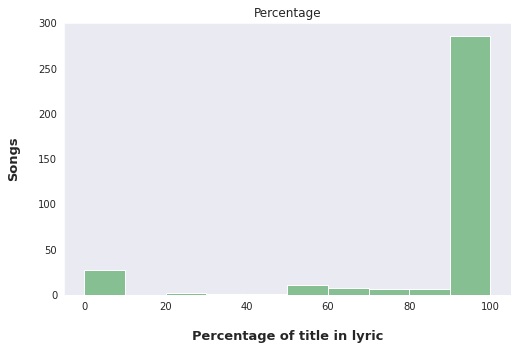

In [ ]:


def percent_title_in_lyric(row):
  if row['Title'] in row['Lyric']:
      percentage = 100 
  else:
    token_lyc = nltk.word_tokenize(row['Lyric'])
    token_tit = nltk.word_tokenize(row['Title'])
    count = 0
    for token in token_tit:
      if token in token_lyc:
        count += 1
    percentage = count/len(token_tit) * 100 
  return percentage

def get_procent_of(dataset, percent):
  percentage_list = dataset.Percentage.tolist()
  occurence = percentage_list.count(percent)
  percentage = (occurence / dataset.shape[0] * 100)
  print('Procentage of songs where {0} % of title is part of lyric: {1}'.format(percent,percentage))

 
my_dataset['Percentage'] = my_dataset.apply (lambda row: percent_title_in_lyric(row), axis=1)

get_procent_of(my_dataset, 100)
get_procent_of(my_dataset, 0)

hist = my_dataset.hist(column='Percentage', grid=False, figsize=(8,5), color='#86bf91')

hist = hist[0]
for x in hist:
  x.set_xlabel("Percentage of title in lyric", labelpad=18, weight='bold', size=13)
  x.set_ylabel("Songs", labelpad=18, weight='bold', size=13)

# Generel statistics on dataset 



Average number of charecters in Title is: 13.870317002881844
Average number of charecters in Lyric is: 1206.5446685878962
Average number of words in Title is: 2.7348703170028816
Average number of words in Lyric is: 249.2420749279539


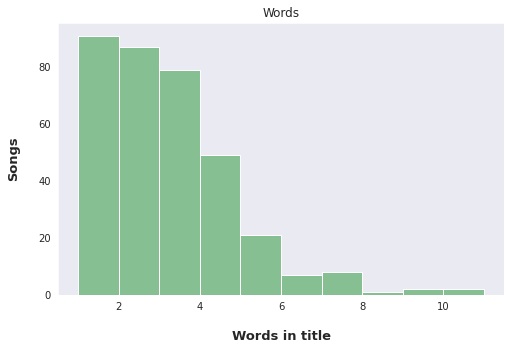

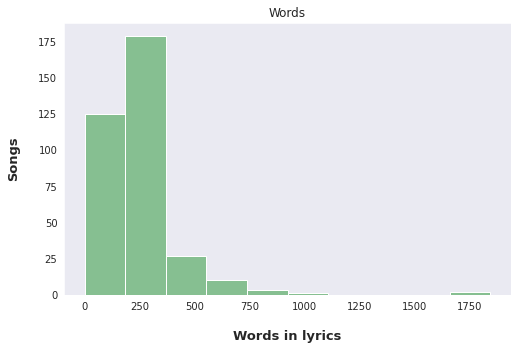

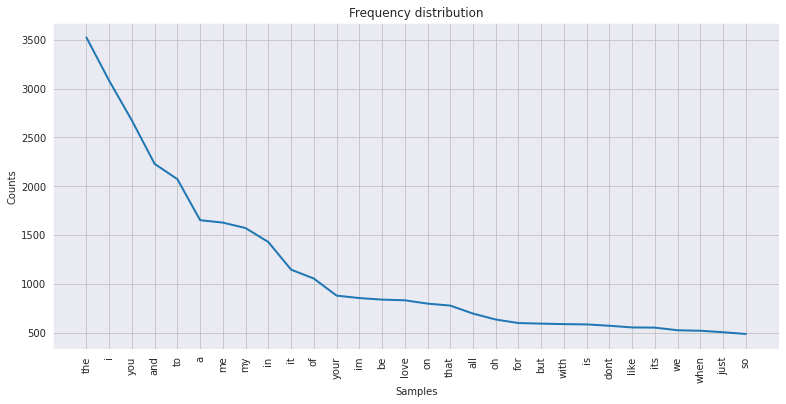

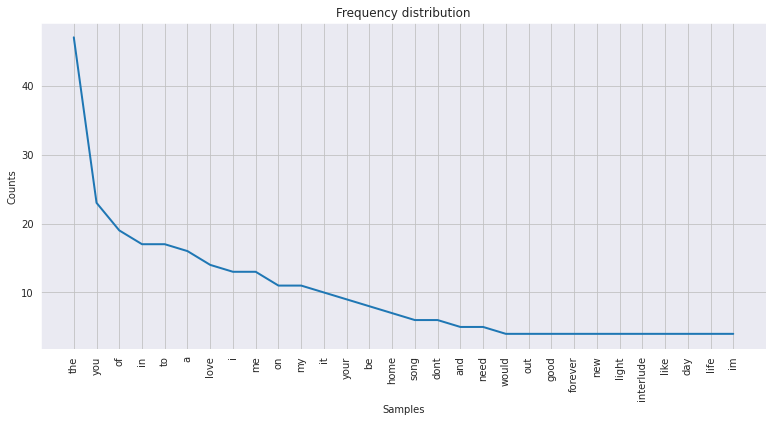

There are 2851 unique words, which is 3.282104414896679% of the total words
There are 406 unique words, which is 42.64705882352941% of the total words


In [ ]:
#finding average amount of words and charecters 
def AverageChar(dataset, column):
  all_char = [len(s) for s in dataset[column]]
  avg_char = sum(all_char) / len(dataset)
  print('Average number of charecters in {0} is: {1}'.format(column, avg_char))

def AverageWords(dataset, column):
  all_words = [len(s.split()) for s in dataset[column]]
  my_dataset['Words'] = all_words
  avg_words = sum(all_words) / len(dataset)
  print('Average number of words in {0} is: {1}'.format(column, avg_words))

AverageChar(my_dataset, 'Title')
AverageChar(my_dataset, 'Lyric')
AverageWords(my_dataset, 'Title')


hist = my_dataset.hist(column='Words', grid=False, figsize=(8,5), color='#86bf91')

hist = hist[0]
for x in hist:
  x.set_xlabel("Words in title", labelpad=18, weight='bold', size=13)
  x.set_ylabel("Songs", labelpad=18, weight='bold', size=13)

AverageWords(my_dataset, 'Lyric')

histo = my_dataset.hist(column='Words', grid=False, figsize=(8,5), color='#86bf91')

histo = histo[0]
for x in histo:
  x.set_xlabel("Words in lyrics", labelpad=18, weight='bold', size=13)
  x.set_ylabel("Songs", labelpad=18, weight='bold', size=13)

#Finding the most frequent words (Stopwords are not excluded)
def Freqwords(top_freq,column):
  txt = column.str.lower().str.replace(r'\|', ' ').str.cat(sep=' ')
  words = nltk.tokenize.word_tokenize(txt)
  fdist = FreqDist(words)
  frequent_words = fdist.most_common(top_freq)
  plt.figure(figsize=(13,6))
  plt.title('Frequency distribution')
  fdist.plot(top_freq)

Freqwords(30,  my_dataset.Lyric)
Freqwords(30, my_dataset.Title)

#Finding the unique words 
def UqWords(column):
  txt = column.str.lower().str.replace(r'\|', ' ').str.cat(sep=' ')
  words = nltk.tokenize.word_tokenize(txt)
  fdist = FreqDist(words)
  unique_words = fdist.hapaxes()
  procent_unique_words = len(unique_words) / len(words) * 100
  print('There are {0} unique words, which is {1}% of the total words'.format(len(unique_words), procent_unique_words))
 
UqWords(my_dataset.Lyric)
UqWords(my_dataset.Title)

# Word embedder

In this I use word2ved as a word embedder in order to get word vectors.

In [ ]:
#The data needs to be tokenized 
my_dataset['Lyric_tok'] = [nltk.tokenize.word_tokenize(s) for s in my_dataset['Lyric']]

#The word2vec takes as input a list of sentences list of list 
sentences = list()
for lyric in my_dataset['Lyric_tok']:
     li = list(lyric)
     sentences.append(li)	

#Because of the size of the dataset, and the mincount is set to 5, alot of the words will not be accounted for in title..
#This word2vec uses skip-gram 

#Make model
model = word2vec.Word2Vec(min_count=5, window=4, size=300, sg=1)

#Build vocab
model.build_vocab(sentences, progress_per=10000)

#Train
model.train(sentences, total_examples=model.corpus_count, epochs=5, report_delay=1)

#Loading a pretrained model
pre_model = models.KeyedVectors.load_word2vec_format('/content/gdrive/My Drive/Kaggle/GoogleNews-vectors-negative300.bin', binary=True)
model2 = word2vec.Word2Vec(min_count=5, window=4, size=300, sg=1)
model2.build_vocab(sentences, progress_per=10000)
model2.intersect_word2vec_format("/content/gdrive/My Drive/Kaggle/GoogleNews-vectors-negative300.bin", binary=True)
model2.train(sentences, total_examples=model.corpus_count, epochs=model2.iter)




# Saving word models

In [ ]:
model.wv.save_word2vec_format('/content/gdrive/My Drive/Kaggle/word2vec_lyrics.txt', binary=False)
model2.wv.save_word2vec_format('/content/gdrive/My Drive/Kaggle/GoogleNews-vectors-negative300.txt', binary=False)

INFO - 16:03:10: storing 1492x300 projection weights into /content/gdrive/My Drive/Kaggle/word2vec_lyrics.txt
INFO - 16:03:10: storing 1492x300 projection weights into /content/gdrive/My Drive/Kaggle/GoogleNews-vectors-negative300.txt


# Splitting dataset 

The dataset will be split into training set, development set and evaluation set.

60% - training set
20% - development set
20% - training set

In [ ]:
#Create evaluation set based on titles, not part of the lyric 
lyric_without_title = my_dataset[my_dataset.Percentage == 0]

lyric_with_title = my_dataset[my_dataset.Percentage != 0]


#remove columns not needed in model eg. artist and percentage
lyric_without_title = lyric_without_title[['Lyric', 'Title']]

lyric_with_title = lyric_with_title[['Lyric', 'Title']]


#Splitting into train, test, dev
train, test = train_test_split (lyric_with_title, test_size=0.1, train_size=0.9)
train, dev = train_test_split(train,test_size = 0.25, train_size =0.75)

#making individual .csv files for each of the datasets
train.to_csv('/content/gdrive/My Drive/Kaggle/LYRICS_DATASET_train.csv',index=False)
dev.to_csv('/content/gdrive/My Drive/Kaggle/LYRICS_DATASET_dev.csv',index=False)
test.to_csv('/content/gdrive/My Drive/Kaggle/LYRICS_DATASET_test_with_title.csv',index=False)
lyric_without_title.to_csv('/content/gdrive/My Drive/Kaggle/LYRICS_DATASET_test_without_title.csv',index=False)
